BIRCH algorithm:

The Balance Iterative Reducing and Clustering using Hierarchies (BIRCH) algorithm works better on large data sets than the k-means algorithm.

It breaks the data into little summaries that are clustered instead of the original data points. The summaries hold as much distribution information about the data points as possible.

This algorithm is commonly used with other clustering algorithm because the other clustering techniques can be used on the summaries generated by BIRCH.

The main downside of the BIRCH algorithm is that it only works on numeric data values. You can't use this for categorical values unless you do some data transformations.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from numpy import unique
from numpy import where

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
#Doing Lable Encoder before split the dataset
columns = ['Genre']
encoder=LabelEncoder()
for i in columns:
    dataset[i] = encoder.fit_transform(dataset[i])

In [7]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [8]:
X = dataset.iloc[:, [3, 4]].values

In [9]:
from sklearn.cluster import Birch

In [10]:
# Apply the BIRCH algorithm
birch_model = Birch(n_clusters=5)
birch_model.fit(X)

C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=5,
      threshold=0.5)

In [11]:
# Assign each data point to a cluster
birch_pred = birch_model.predict(X)

In [12]:
# Get unique clusters
birch_clusters = np.unique(birch_pred)

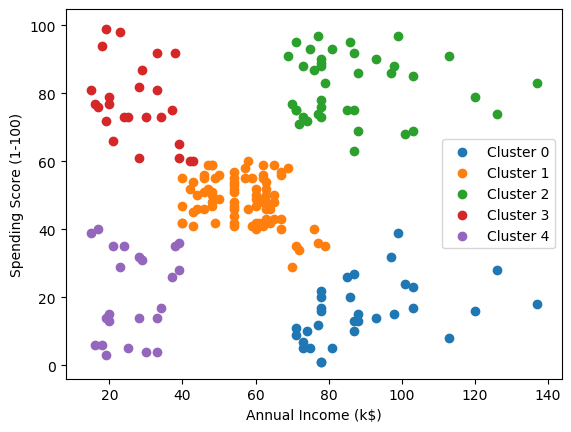

In [13]:
# Plot the BIRCH clusters
for birch_cluster in birch_clusters:
    # Get indices of data points in this cluster
    indices = where(birch_pred == birch_cluster)
    # Make the plot
    pyplot.scatter(X[indices, 0], X[indices, 1], label=f'Cluster {birch_cluster}')

# Add labels and legend
pyplot.xlabel('Annual Income (k$)')
pyplot.ylabel('Spending Score (1-100)')
pyplot.legend()
pyplot.show()

In [14]:
supervised=pd.DataFrame(dataset)

In [15]:
supervised['Cluster_group']=birch_pred

In [16]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,0


C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


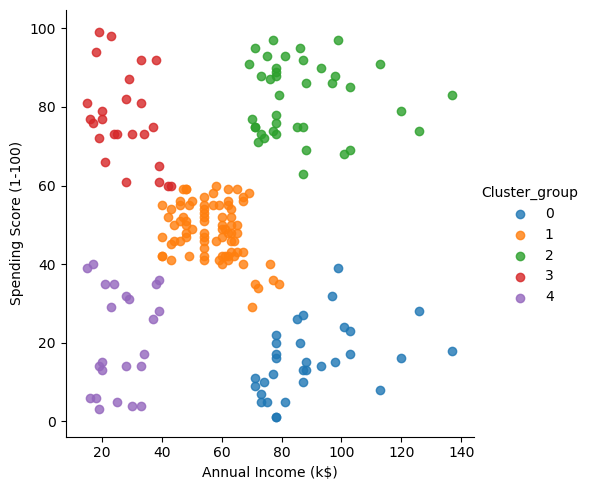

In [17]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True)